In [179]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This is a magic function that renders figures inside the notebook
# https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
%matplotlib inline

# use pandas to load/read the data and it will be placed in a data structure called a dataframe
data = pd.read_csv('ex1data1.txt', header=None, names=['population', 'profit'])
# returns the first 5 rows of the data
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [180]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


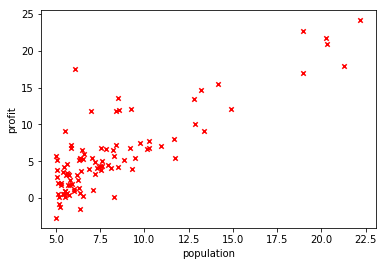

In [181]:
# plot the data to visualize it
data.plot(kind='scatter', x='population',y='profit',marker='x',color='r')

In [182]:
# as mentioned in the assignment: 
# "To take into account the intercept term (theta0), 
#  we add an additional first column to X and set it to all ones. 
#  This allows us to treat (theta0) as simply another ‘feature’".
data.insert(0, 'Ones', 1)
data.head()

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [191]:
# according to the model and notation used in class,
# x is used to denote the “input” variables/features and 
# y is used to denote the “output” or target variable/feature that we want to predict

# we place the input features in an array called X, using the slicing technique in python
X = data.iloc[:, 0:data.shape[1]-1]
# then we convert this array into a matrix
X = np.matrix(X.values)
# we check the dimensions X
X.shape

(97, 2)

In [192]:
y = data.iloc[:, data.shape[1]-1:data.shape[1]]
# matrix with the target feature values
y = np.matrix(y)
y.shape

(97, 1)

In [193]:
# create a matrix to represent the parameters and initialize the matrix with zeros
parameters = np.zeros((1,2))
parameters.shape

(1, 2)

In [186]:
parameters = np.matrix([0,0])
parameters.shape

(1, 2)

In [194]:
# function to calculate the cost function
# where the hypothesis will be equal to X matrix multiplied by the transpose of parameters matrix 
def cost_function(X,y,parameters):
    hypothesis = X * parameters.T
    return  np.sum(np.square(hypothesis - y)) / (2*X.shape[0])

# test the cost function
costFunction(X,y,parameters)

32.072733877455676

In [216]:
# function representing the gradient descent algorithm to
# calculate the minimum values of the parameters
def gradient_descent(X, y, alpha, parameters, iterations):
    # number of training data
    m = X.shape[0] 
    # number of parameters 
    parameters_n = parameters.shape[1]
    # empty matrix to make the simultanous change between the old parameters and the newly calculated parameters
    temp_parameters = np.matrix(np.zeros(parameters.shape)) 
    # to store the value of the cost fn at every iteration to be able to visualize it
    cost_fn_array = np.zeros(iterations)
    
    for i in range(iterations):
        for j in range(parameters_n):
            error = (X * parameters.T) - y        
            temp_parameters[0, j] = parameters[0, j] - ((alpha/m) * np.sum(np.multiply(error, X[:,j])))
        parameters = temp_parameters
        cost_fn_array[i] = cost_function(X, y, parameters)
    return parameters, cost_fn_array


In [217]:
# test of the gradient_descent function
alpha = 0.01
iterations = 1500
optimized_parameters, cost = gradient_descent(X, y, alpha, parameters, iterations)
optimized_parameters

matrix([[-3.63609474,  1.16699229]])

Text(0.5,1,'Predicted Profit vs. Population Size')

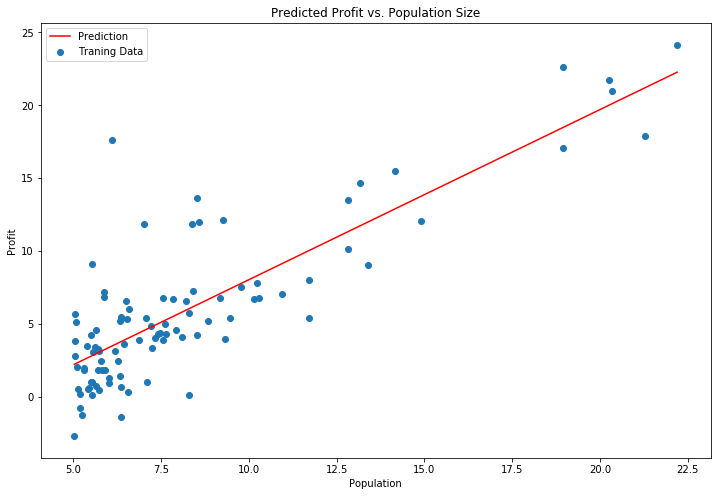

In [219]:
# fit the hypothesis with the optimized_parameters as a line on the data

# create an array of equally spaced values from the min to the max
# so that this can serve as the range of 
x = np.linspace(data.population.min(), data.population.max()) 
f = optimized_parameters[0,0] + (optimized_parameters[0,1] * x)

#plt.subplots() is a function that returns a tuple containing a figure and axes object(s).
#https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2) # loc is the location of the legend
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

Text(0,0.5,'cost function value')

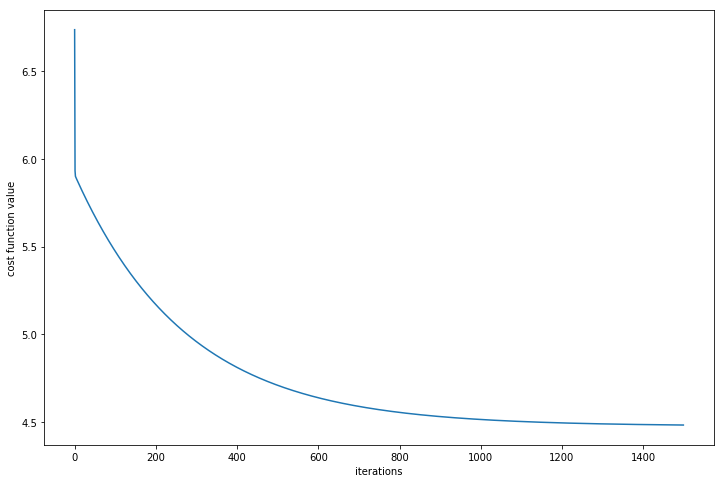

In [220]:
# plot the value of the cost function with every iteration
plt.figure(figsize=(12,8))
plt.plot(range(0,iterations), cost)
plt.xlabel('iterations')
plt.ylabel('cost function value')